<a href="https://colab.research.google.com/github/24singhar/ML-Fraud-Detection/blob/main/Neighborhood_Search_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neighborhood Search

In this notebook, we will look at how to apply neighborhood search techniques to solve a scheduling problem. The following code block imports libraries that we will use.

In [4]:
import json
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from tqdm.auto import tqdm

## Neighborhood Search Overview

A neighborhood search procedure is an optimization technique used to find a solution to a problem by iteratively exploring the "neighborhood" of a current "incumbent" solution. The incumbent solution corresponds to the best solution encountered at a current point during the execution of an algorithm. The neighborhood of a solution consists of all possible solutions that can be reached from the incumbent by making a small or local change, i.e., they are "close" to the incumbent solution, where the definition of close depends on the neighborhood structure that is being used.

## Data
We will apply neighborhood search to the Traveling Salesman Problem (TSP). The TSP seeks to identify a tour among a given set of locations that visits each city exactly once, returns to the origin, and minimizes the total travel distance. Even though the TSP is typically solved in the context of logistics, it is a scheduling problem that can be represented as $1/s_{ij}/C_{max}$ using $\alpha / \beta / \gamma$ notation.

The following code block generates data for a TSP instance of a specified size, $n$.

In [75]:
N = 200
locations = [i for i in range(1, N+1)]

np.random.seed(0)

coordinates = pd.DataFrame(
    np.random.uniform(low=0, high=100, size=(N, 2)),
    index=locations,
    columns=['x', 'y'],
)
coordinate_dicts = coordinates.to_dict(orient='index')

d = pd.DataFrame(
    euclidean_distances(coordinates, coordinates),
    index=locations,
    columns=locations,
).reset_index().rename(
    columns={'index': 'start'}
).melt(
    id_vars=['start']
).rename(
    columns={
        'variable': 'end',
        'value': 'distance',
    }
).set_index(
    ['start', 'end']
)['distance'].to_dict()

The following code block defines a function we can use to plot a TSP instance and a tour (if provided)

In [76]:
def generate_plot(
    tour_list: list = [],
    label_locations: bool = True,
):

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    coordinates.plot(
        kind='scatter',
        x='x',
        y='y',
        edgecolor='k',
        ax=ax,
    )

    ax.spines[['right', 'top']].set_visible(False)
    if label_locations:
        for customer, coordinate_dict in coordinate_dicts.items():
            ax.annotate(customer, (coordinate_dict['x']*1.02, coordinate_dict['y']*1.02))

    if tour_list:
        x_list, y_list = [], []
        for location_idx, location in enumerate(tour_list[:-1], 0):
            x_list.append([coordinate_dicts[location]['x'], coordinate_dicts[tour_list[location_idx+1]]['x']])
            y_list.append([coordinate_dicts[location]['y'], coordinate_dicts[tour_list[location_idx+1]]['y']])
        x_list.append([coordinate_dicts[tour_list[-1]]['x'], coordinate_dicts[tour_list[0]]['x']])
        y_list.append([coordinate_dicts[tour_list[-1]]['y'], coordinate_dicts[tour_list[0]]['y']])

        ax.plot(
            x_list,
            y_list,
            color='steelblue',
        )

    plt.show()

The following code block demonstrates the plotting function (no tour provided)

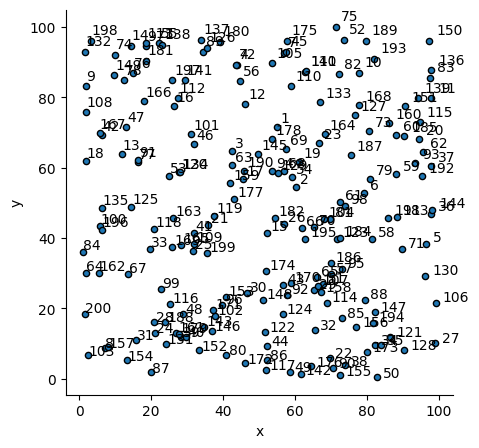

In [77]:
generate_plot()

The following code block demonstrates the plotting function if a tour is provided

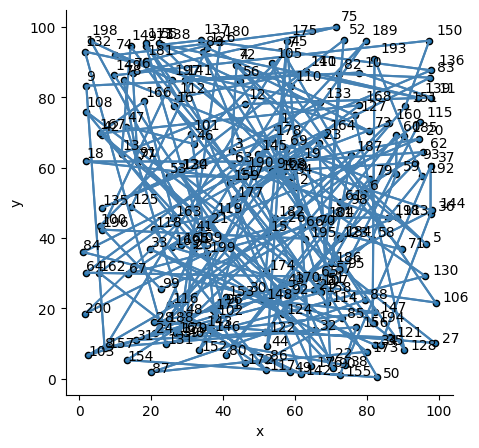

In [78]:
heuristic_solution = [i for i in locations]

generate_plot(tour_list=heuristic_solution)

## Function for computing objective (total distance)

The following code block defines a function to compute the total distance for a tour

In [9]:
def compute_total_distance(schedule_list) -> float:

    total_distance = 0
    for start_idx in range(len(schedule_list)-1):
        start_location = schedule_list[start_idx]
        end_location = schedule_list[start_idx + 1]
        total_distance += d[start_location, end_location]

    # handle return to origin
    start_location = schedule_list[-1]
    end_location = schedule_list[0]
    total_distance += d[start_location, end_location]

    return total_distance

In [79]:
compute_total_distance(locations)

9477.985298168893

In [80]:
best_tour = None
best_distance = 99999

for starting_location in locations:
  tour = [starting_location]
  unvisited_locations = [loc for loc in locations if loc not in tour]

  while unvisited_locations:
    min_distance = 99999
    min_location = None

    current_location = tour[-1]
    for ending_location in unvisited_locations:
      if d[current_location, ending_location] < min_distance:
        min_distance = d[current_location, ending_location]
        min_location = ending_location

    tour.append(min_location)
    unvisited_locations = [loc for loc in locations if loc not in tour]
    tour_distance = compute_total_distance(tour)

    if tour_distance < best_distance:
      best_distance = tour_distance
      best_tour = tour

In [81]:
compute_total_distance(best_tour)

1381.6891146995265

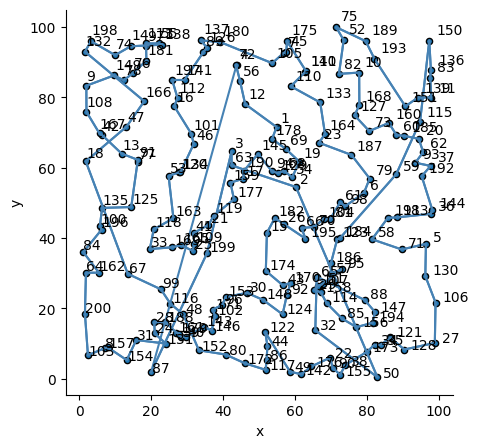

In [82]:
generate_plot(best_tour)

In [83]:
starting_location = 1
tour = [starting_location]
unvisited_locations = [loc for loc in locations if loc not in tour]

while unvisited_locations:
  min_distance = 99999
  min_location = None

  current_location = tour[-1]
  for ending_location in unvisited_locations:
    if d[current_location, ending_location] < min_distance:
      min_distance = d[current_location, ending_location]
      min_location = ending_location

  tour.append(min_location)
  unvisited_locations = [loc for loc in locations if loc not in tour]

In [84]:
compute_total_distance(tour)

1373.4306326193619

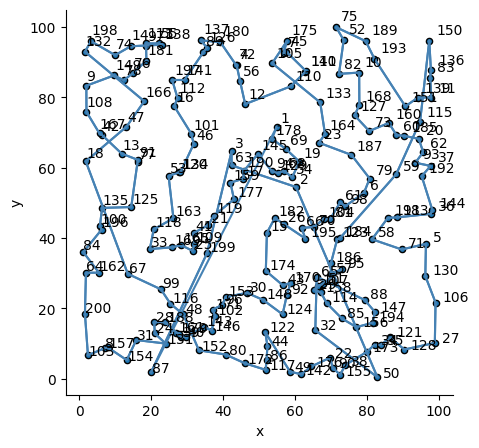

In [85]:
generate_plot(tour)

In [44]:
def get_API_neighbor(starting_solution):

  neighbor_solution = list(starting_solution)

  possible_ind = list(range(len(neighbor_solution)-1))
  idx1 = random.choice(possible_ind)
  idx2 = idx1 + 1

  neighbor_solution[idx1], neighbor_solution[idx2] = neighbor_solution[idx2], neighbor_solution[idx1]

  return neighbor_solution

In [55]:
get_API_neighbor(locations)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [92]:
best_API_tour = list(best_tour)
best_API_distance = compute_total_distance(best_API_tour)

random.seed(0)

max_ni = 10000
iteration = 0
while iteration < max_ni:
  iteration += 1
  neighbor_tour = get_API_neighbor(best_API_tour)
  neighbor_distance = compute_total_distance(neighbor_tour)
  if neighbor_distance < best_API_distance:
    best_API_tour = neighbor_tour
    best_API_distance = neighbor_distance
    iteration = 0
    print('Found better solution')

Found better solution
Found better solution
Found better solution
Found better solution
Found better solution


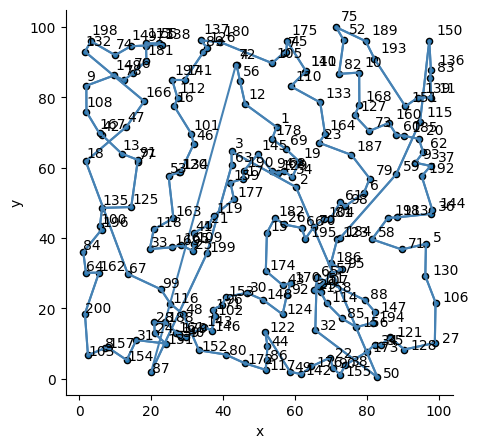

In [93]:
generate_plot(best_API_tour)

In [94]:
def get_SSR_neighbor(starting_solution):

  neighbor_solution = list(starting_solution)

  possible_idx = list(range(len(neighbor_solution)))
  idx1, idx2 = sorted(random.choices(possible_idx, k=2))
  neighbor_solution[idx1:idx2+1] = neighbor_solution[idx1:idx2+1][::-1]
  return neighbor_solution

In [97]:
best_SSR_tour = list(best_tour)
best_SSR_distance = compute_total_distance(best_SSR_tour)

random.seed(0)

max_ni = 10000
iteration = 0
while iteration < max_ni:
  iteration += 1
  neighbor_tour = get_SSR_neighbor(best_SSR_tour)
  neighbor_distance = compute_total_distance(neighbor_tour)
  if neighbor_distance < best_SSR_distance:
    best_SSR_tour = neighbor_tour
    best_SSR_distance = neighbor_distance
    iteration = 0
    print('Found better solution')

Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found better solution
Found bett

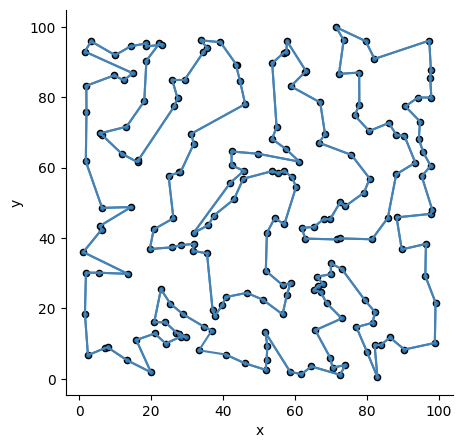

In [100]:
generate_plot(best_SSR_tour, label_locations=False)

In [91]:
compute_total_distance(best_SSR_tour)

1322.3464774836366